# Evaluating fallback supplemented model performance <br> overall, by reseller priorirty rank

In [1]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

In [2]:
# install.packages("pkgcond")

In [3]:
library(dplyr)
library(data.table)
library(partykit)
library(tictoc)
library(caret)
library(e1071)
library(randomForest)
library(ranger)

#for 3d plotting
library(akima)
library(plotly)

# for prep data
# library(rPython)
library(stringr)
library(pbapply)
library(stringdist)
library(data.table)
library(dominanceanalysis)
library(zoo)


getwd()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: lattice

Loading required package: ggplot2

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:sta

[1] "/home/jupyter/Domains_202003/scripts/phaseII_06_fallbacksupp"

In [4]:
# install.packages(c("zoo"))

In [5]:

source('../orig/functions.R')

source('../orig/functions_models.R')

source('../phaseII_03_forest/functions_eval.R')



Attaching package: ‘tidyr’


The following object is masked from ‘package:stringdist’:

    extract




In [6]:
source('functions_metalearning.R')

In [7]:
source('functions_fallback.R')

In [8]:
# source('load_prep_data_expiry_2.R') #read in train test and predictions manually instead

# READ CSV's
# expiry_df_test_preds <- read.csv("../../data/output/datapull_20201116/expiry_df_test_preds.csv")
# expiry_df_train <- read.csv("../../data/output/datapull_20201116/expiry_df_train.csv")
# expiry_df_test <- read.csv("../../data/output/datapull_20201116/expiry_df_test.csv")

# expiry_df
# expiry_train_df 
# expiry_test_df 
# expiry_list
# expiry_train_list
# expiry_test_list

# LOAD fallbacksupp'ed preds

In [9]:
# geo_suppl for train and test-pred data
preds_df <- read.csv("../../data/output/datapull_20201116/expiry_df_test_preds_fb.csv")
head(preds_df)

,reseller,reseller_country,domain_id,renewal_type,renewed_count,expiry_date,creation_date,status,domain,registrar,registrant_country,reg_period,reg_revenue,reg_arpt,renew_mbg,renewal_item_id,renew_type,autorenew_type,renewal_status,renew_date,renew_arpt,gibb_score,pattern,pattern_domain_count,day_domains,⋯,pred_agg_glm,pred_agg_rf,pred_seg_glm_ALL,pred_seg_rf_ALL,pred_seg2_glm_ALL,pred_seg2_rf_ALL,reseller_geo,pred_agg_glm_ALL_fb,pred_agg_rf_ALL_fb,pred_agg_glm_fb,pred_agg_rf_fb,pred_seg_glm_ALL_fb,pred_seg_rf_ALL_fb,pred_seg2_glm_ALL_fb,pred_seg2_rf_ALL_fb,reg_arpt_org,reg_arpt_slab,pred_seg2_rf_ALL_fb2,pred_seg2_glm_ALL_fb2,pred_seg_rf_ALL_fb2,pred_seg_glm_ALL_fb2,pred_agg_rf_fb2,pred_agg_glm_fb2,pred_agg_rf_ALL_fb2,pred_agg_glm_ALL_fb2
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,,,122049036,FirstTime,1,2020-08-30,2019-08-30,Active,qianxiyun.online,,NA,1,25,25.00,0,341703158,auto-renewal,unrealized,Not Renewd,2020-08-30,6,0.63,qianxiyun,1,1,⋯,NA,0.7713468,NA,NA,NA,NA,NA,NA,0.9550391,NA,0.7713468,NA,NA,NA,NA,25.00,"(15,25]",0.5510000,0.5510000,0.5510000,0.551,0.7713468,0.551,0.9550391,0.551
2,1&1 Internet,Germany,43450963,FirstTime,1,2020-01-27,2017-01-27,Active,ncyc.online,1&1 Internet,NA,3,55,18.33,0,239731665,transfer,NA,Renewed,2019-10-13,25,1.18,ncyc,1,23,⋯,0.817,0.6676114,0.543,0.7268116,0.5644593,0.7075837,EU,0.817,0.6088277,0.817,0.6676114,0.543,0.7268116,0.5644593,0.7075837,18.33,"(15,25]",0.7075837,0.5644593,0.7268116,0.543,0.6676114,0.817,0.6088277,0.817
3,1&1 Internet,Germany,43576888,FirstTime,1,2020-01-31,2017-01-31,Active,audev.online,1&1 Internet,NA,3,55,18.33,0,287997921,auto-renewal,realized,Renewed,2020-01-31,25,2.57,audev,1,43,⋯,0.814,0.6877335,0.536,0.7155560,0.5601541,0.7314602,EU,0.814,0.6477227,0.814,0.6877335,0.536,0.7155560,0.5601541,0.7314602,18.33,"(15,25]",0.7314602,0.5601541,0.7155560,0.536,0.6877335,0.814,0.6477227,0.814
4,1&1 Internet,Germany,43727452,FirstTime,1,2020-02-03,2017-02-03,Active,pinkpanther.store,1&1 Internet,NA,3,88,29.33,0,288786056,auto-renewal,unrealized,Not Renewd,2020-02-03,40,7.27,pinkpanther,1,3,⋯,0.838,0.2588170,0.513,0.2754756,0.1642908,0.1535971,EU,0.833,0.2384536,0.838,0.2588170,0.513,0.2754756,0.1642908,0.1535971,29.33,"(25,35]",0.1535971,0.1642908,0.2754756,0.513,0.2588170,0.838,0.2384536,0.833
5,1&1 Internet,Germany,46911148,FirstTime,1,2020-04-17,2017-04-17,Active,lmengineeringservices.online,1&1 Internet,NA,3,50,16.67,0,308749164,auto-renewal,realized,Renewed,2020-04-17,25,7.81,lmengineeringservices,1,69,⋯,0.775,0.3878439,0.468,0.3962124,0.4979086,0.3769304,EU,0.772,0.3972606,0.775,0.3878439,0.468,0.3962124,0.4979086,0.3769304,16.67,"(15,25]",0.3769304,0.4979086,0.3962124,0.468,0.3878439,0.775,0.3972606,0.772
6,1&1 Internet,Germany,47605334,FirstTime,1,2020-05-08,2017-05-08,Active,eagleeyeview.store,1&1 Internet,NA,3,90,30.00,0,313867134,auto-renewal,unrealized,Not Renewd,2020-05-08,40,3.41,eagleeyeview,1,4,⋯,0.829,0.1730035,0.516,0.1675698,0.1723292,0.1027711,EU,0.823,0.1925156,0.829,0.1730035,0.516,0.1675698,0.1723292,0.1027711,30.00,"(25,35]",0.1027711,0.1723292,0.1675698,0.516,0.1730035,0.829,0.1925156,0.823


In [10]:
preds_df %>%
  select(contains('pred_')) %>%  # replace to your needs
  summarise_all(funs(sum(is.na(.)))) %>% t()

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


pred_agg_glm_ALL,4
pred_agg_rf_ALL,0
pred_agg_glm,9704
pred_agg_rf,0
pred_seg_glm_ALL,254
pred_seg_rf_ALL,9
pred_seg2_glm_ALL,2092
pred_seg2_rf_ALL,58
pred_agg_glm_ALL_fb,28999
pred_agg_rf_ALL_fb,28995
pred_agg_glm_fb,29047


# ASSESS overall model performance
original code in 02_*

In [11]:
head(preds_df)

,reseller,reseller_country,domain_id,renewal_type,renewed_count,expiry_date,creation_date,status,domain,registrar,registrant_country,reg_period,reg_revenue,reg_arpt,renew_mbg,renewal_item_id,renew_type,autorenew_type,renewal_status,renew_date,renew_arpt,gibb_score,pattern,pattern_domain_count,day_domains,⋯,pred_agg_glm,pred_agg_rf,pred_seg_glm_ALL,pred_seg_rf_ALL,pred_seg2_glm_ALL,pred_seg2_rf_ALL,reseller_geo,pred_agg_glm_ALL_fb,pred_agg_rf_ALL_fb,pred_agg_glm_fb,pred_agg_rf_fb,pred_seg_glm_ALL_fb,pred_seg_rf_ALL_fb,pred_seg2_glm_ALL_fb,pred_seg2_rf_ALL_fb,reg_arpt_org,reg_arpt_slab,pred_seg2_rf_ALL_fb2,pred_seg2_glm_ALL_fb2,pred_seg_rf_ALL_fb2,pred_seg_glm_ALL_fb2,pred_agg_rf_fb2,pred_agg_glm_fb2,pred_agg_rf_ALL_fb2,pred_agg_glm_ALL_fb2
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,,,122049036,FirstTime,1,2020-08-30,2019-08-30,Active,qianxiyun.online,,NA,1,25,25.00,0,341703158,auto-renewal,unrealized,Not Renewd,2020-08-30,6,0.63,qianxiyun,1,1,⋯,NA,0.7713468,NA,NA,NA,NA,NA,NA,0.9550391,NA,0.7713468,NA,NA,NA,NA,25.00,"(15,25]",0.5510000,0.5510000,0.5510000,0.551,0.7713468,0.551,0.9550391,0.551
2,1&1 Internet,Germany,43450963,FirstTime,1,2020-01-27,2017-01-27,Active,ncyc.online,1&1 Internet,NA,3,55,18.33,0,239731665,transfer,NA,Renewed,2019-10-13,25,1.18,ncyc,1,23,⋯,0.817,0.6676114,0.543,0.7268116,0.5644593,0.7075837,EU,0.817,0.6088277,0.817,0.6676114,0.543,0.7268116,0.5644593,0.7075837,18.33,"(15,25]",0.7075837,0.5644593,0.7268116,0.543,0.6676114,0.817,0.6088277,0.817
3,1&1 Internet,Germany,43576888,FirstTime,1,2020-01-31,2017-01-31,Active,audev.online,1&1 Internet,NA,3,55,18.33,0,287997921,auto-renewal,realized,Renewed,2020-01-31,25,2.57,audev,1,43,⋯,0.814,0.6877335,0.536,0.7155560,0.5601541,0.7314602,EU,0.814,0.6477227,0.814,0.6877335,0.536,0.7155560,0.5601541,0.7314602,18.33,"(15,25]",0.7314602,0.5601541,0.7155560,0.536,0.6877335,0.814,0.6477227,0.814
4,1&1 Internet,Germany,43727452,FirstTime,1,2020-02-03,2017-02-03,Active,pinkpanther.store,1&1 Internet,NA,3,88,29.33,0,288786056,auto-renewal,unrealized,Not Renewd,2020-02-03,40,7.27,pinkpanther,1,3,⋯,0.838,0.2588170,0.513,0.2754756,0.1642908,0.1535971,EU,0.833,0.2384536,0.838,0.2588170,0.513,0.2754756,0.1642908,0.1535971,29.33,"(25,35]",0.1535971,0.1642908,0.2754756,0.513,0.2588170,0.838,0.2384536,0.833
5,1&1 Internet,Germany,46911148,FirstTime,1,2020-04-17,2017-04-17,Active,lmengineeringservices.online,1&1 Internet,NA,3,50,16.67,0,308749164,auto-renewal,realized,Renewed,2020-04-17,25,7.81,lmengineeringservices,1,69,⋯,0.775,0.3878439,0.468,0.3962124,0.4979086,0.3769304,EU,0.772,0.3972606,0.775,0.3878439,0.468,0.3962124,0.4979086,0.3769304,16.67,"(15,25]",0.3769304,0.4979086,0.3962124,0.468,0.3878439,0.775,0.3972606,0.772
6,1&1 Internet,Germany,47605334,FirstTime,1,2020-05-08,2017-05-08,Active,eagleeyeview.store,1&1 Internet,NA,3,90,30.00,0,313867134,auto-renewal,unrealized,Not Renewd,2020-05-08,40,3.41,eagleeyeview,1,4,⋯,0.829,0.1730035,0.516,0.1675698,0.1723292,0.1027711,EU,0.823,0.1925156,0.829,0.1730035,0.516,0.1675698,0.1723292,0.1027711,30.00,"(25,35]",0.1027711,0.1723292,0.1675698,0.516,0.1730035,0.829,0.1925156,0.823


In [12]:
tail(preds_df)

,reseller,reseller_country,domain_id,renewal_type,renewed_count,expiry_date,creation_date,status,domain,registrar,registrant_country,reg_period,reg_revenue,reg_arpt,renew_mbg,renewal_item_id,renew_type,autorenew_type,renewal_status,renew_date,renew_arpt,gibb_score,pattern,pattern_domain_count,day_domains,⋯,pred_agg_glm,pred_agg_rf,pred_seg_glm_ALL,pred_seg_rf_ALL,pred_seg2_glm_ALL,pred_seg2_rf_ALL,reseller_geo,pred_agg_glm_ALL_fb,pred_agg_rf_ALL_fb,pred_agg_glm_fb,pred_agg_rf_fb,pred_seg_glm_ALL_fb,pred_seg_rf_ALL_fb,pred_seg2_glm_ALL_fb,pred_seg2_rf_ALL_fb,reg_arpt_org,reg_arpt_slab,pred_seg2_rf_ALL_fb2,pred_seg2_glm_ALL_fb2,pred_seg_rf_ALL_fb2,pred_seg_glm_ALL_fb2,pred_agg_rf_fb2,pred_agg_glm_fb2,pred_agg_rf_ALL_fb2,pred_agg_glm_ALL_fb2
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
932342,Zhengzhou Zitian,China,102184904,FirstTime,1,2020-04-27,2019-04-27,Active,keamu.press,Zhengzhou Zitian,NA,1,1.08,1.08,0,311602364,transfer,unrealized,Renewed,2020-04-27,5,5.76,kea,2,99,⋯,NA,0.5562021,1.000,0.9904499,1.000000e+00,0.9991572,China,NA,NA,NA,NA,NA,NA,NA,NA,1.08,"(1,3]",0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081
932343,Zhengzhou Zitian,China,102184919,FirstTime,1,2020-04-27,2019-04-27,Active,antsq.press,Zhengzhou Zitian,NA,1,1.08,1.08,0,311602369,transfer,unrealized,Renewed,2020-04-27,5,2.65,antq,2,99,⋯,NA,0.5151500,1.000,0.9960650,1.000000e+00,0.9991572,China,NA,NA,NA,NA,NA,NA,NA,NA,1.08,"(1,3]",0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081
932344,Zhengzhou Zitian,China,102184939,FirstTime,1,2020-04-27,2019-04-27,Active,oqcew.press,Zhengzhou Zitian,NA,1,1.08,1.08,0,311602379,transfer,unrealized,Renewed,2020-04-27,5,0.45,oqcew,1,99,⋯,NA,0.4796626,1.000,0.9997720,1.000000e+00,0.9995875,China,NA,NA,NA,NA,NA,NA,NA,NA,1.08,"(1,3]",0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081
932345,Zhengzhou Zitian,China,102184984,FirstTime,1,2020-04-27,2019-04-27,Active,wudpg.press,Zhengzhou Zitian,NA,1,1.08,1.08,0,311602399,transfer,unrealized,Renewed,2020-04-27,5,0.10,wudpg,1,99,⋯,NA,0.4671878,1.000,0.9997720,1.000000e+00,0.9995875,China,NA,NA,NA,NA,NA,NA,NA,NA,1.08,"(1,3]",0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081
932346,Zhengzhou Zitian,China,110175746,FirstTime,1,2020-06-26,2019-06-26,Active,xiangcheng.host,Zhengzhou Zitian,NA,1,1.08,1.08,0,325202554,auto-renewal,unrealized,Not Renewd,2020-06-26,5,6.43,xiangcheng,1,1,⋯,NA,0.5123320,0.611,0.6226976,NA,1.0000000,China,NA,NA,NA,NA,NA,NA,NA,NA,1.08,"(1,3]",0.072,0.072,0.072,0.072,0.072,0.072,0.072,0.072
932347,ZhuHai NaiSiNiKe,China,44896107,FirstTime,1,2020-02-24,2017-02-24,Active,justgo.pw,ZhuHai NaiSiNiKe,NA,3,3.25,1.08,0,294671419,auto-renewal,unrealized,Not Renewd,2020-02-24,3,3.69,justgo,1,7,⋯,NA,0.5606649,0.000,0.2526667,5.826215e-11,0.2526667,China,NA,NA,NA,NA,NA,NA,NA,NA,1.08,"(1,3]",0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059


In [13]:
preds_df %>% filter(is.na(pred_agg_glm_ALL)) %>% nrow()
preds_df %>% filter(is.na(pred_agg_glm_ALL)) 

[1] 4

reseller,reseller_country,domain_id,renewal_type,renewed_count,expiry_date,creation_date,status,domain,registrar,registrant_country,reg_period,reg_revenue,reg_arpt,renew_mbg,renewal_item_id,renew_type,autorenew_type,renewal_status,renew_date,renew_arpt,gibb_score,pattern,pattern_domain_count,day_domains,⋯,pred_agg_glm,pred_agg_rf,pred_seg_glm_ALL,pred_seg_rf_ALL,pred_seg2_glm_ALL,pred_seg2_rf_ALL,reseller_geo,pred_agg_glm_ALL_fb,pred_agg_rf_ALL_fb,pred_agg_glm_fb,pred_agg_rf_fb,pred_seg_glm_ALL_fb,pred_seg_rf_ALL_fb,pred_seg2_glm_ALL_fb,pred_seg2_rf_ALL_fb,reg_arpt_org,reg_arpt_slab,pred_seg2_rf_ALL_fb2,pred_seg2_glm_ALL_fb2,pred_seg_rf_ALL_fb2,pred_seg_glm_ALL_fb2,pred_agg_rf_fb2,pred_agg_glm_fb2,pred_agg_rf_ALL_fb2,pred_agg_glm_ALL_fb2
<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,,122049036,FirstTime,1,2020-08-30,2019-08-30,Active,qianxiyun.online,,NA,1,25,25,0,341703158,auto-renewal,unrealized,Not Renewd,2020-08-30,6,0.63,qianxiyun,1,1,⋯,NA,0.7713468,NA,NA,NA,NA,NA,NA,0.9550391,NA,0.7713468,NA,NA,NA,NA,25,"(15,25]",0.551,0.551,0.551,0.551,0.7713468,0.551,0.9550391,0.551
Imperial Registrations,United States,83956614,FirstTime,1,2019-11-19,2018-11-19,Active,frogjuggler.online,Imperial Registrations,NA,1,25,25,0,256244725,auto-renewal,unrealized,Not Renewd,2019-11-19,25,2.98,frogjuggler,1,1,⋯,NA,0.8257238,NA,NA,NA,NA,United States,NA,0.9948964,NA,0.8257238,NA,NA,NA,NA,25,"(15,25]",0.551,0.551,0.551,0.551,0.8257238,0.551,0.9948964,0.551
Imperial Registrations,United States,83956624,FirstTime,1,2019-11-19,2018-11-19,Active,frogjuggler.site,Imperial Registrations,NA,1,20,20,0,256244735,auto-renewal,unrealized,Not Renewd,2019-11-19,20,2.98,frogjuggler,1,1,⋯,NA,0.5626476,NA,NA,NA,NA,United States,NA,0.9880768,NA,0.5626476,NA,NA,NA,NA,20,"(15,25]",0.491,0.491,0.491,0.491,0.5626476,0.491,0.9880768,0.491
Register.ca,Canada,74267354,FirstTime,1,2019-08-15,2018-08-15,Active,ontarioart.space,Register.ca,NA,1,6,6,0,222880706,auto-renewal,unrealized,Not Renewd,2019-08-15,15,6.11,ontarioart,1,1,⋯,NA,0.7286549,NA,NA,NA,NA,Canada,NA,0.9855667,NA,0.7286549,NA,NA,NA,NA,6,"(5,10]",0.337,0.337,0.337,0.337,0.7286549,0.337,0.9855667,0.337


In [14]:
preds_df %>%
  select(contains('pred_')) %>%  # replace to your needs
  names()

[1] "pred_agg_glm_ALL"      "pred_agg_rf_ALL"       "pred_agg_glm"         
 [4] "pred_agg_rf"           "pred_seg_glm_ALL"      "pred_seg_rf_ALL"      
 [7] "pred_seg2_glm_ALL"     "pred_seg2_rf_ALL"      "pred_agg_glm_ALL_fb"  
[10] "pred_agg_rf_ALL_fb"    "pred_agg_glm_fb"       "pred_agg_rf_fb"       
[13] "pred_seg_glm_ALL_fb"   "pred_seg_rf_ALL_fb"    "pred_seg2_glm_ALL_fb" 
[16] "pred_seg2_rf_ALL_fb"   "pred_seg2_rf_ALL_fb2"  "pred_seg2_glm_ALL_fb2"
[19] "pred_seg_rf_ALL_fb2"   "pred_seg_glm_ALL_fb2"  "pred_agg_rf_fb2"      
[22] "pred_agg_glm_fb2"      "pred_agg_rf_ALL_fb2"   "pred_agg_glm_ALL_fb2"

In [15]:

lift_list <- list()
auc_list <- list()

fallback_lift <- chart_lift(pred_df=preds_df,
                        dep_var = "renewal_status",
                        pred_var = "pred_agg_glm_ALL") 

lift_list[["fallback"]] <- fallback_lift
auc_list[["fallback"]] <- calc_auc(lift_df=fallback_lift)

models <- c('pred_agg_glm_ALL','pred_agg_rf_ALL','pred_agg_glm','pred_agg_rf',
            'pred_seg_glm_ALL', 'pred_seg_rf_ALL','pred_seg2_glm_ALL','pred_seg2_rf_ALL',
           'pred_seg2_rf_ALL_fb2', 'pred_seg2_glm_ALL_fb2', 'pred_seg_rf_ALL_fb2', 
            'pred_seg_glm_ALL_fb2', 'pred_agg_rf_fb2', 'pred_agg_glm_fb2', 
            'pred_agg_rf_ALL_fb2','pred_agg_glm_ALL_fb2')


for (model in models){
    model_lift <- chart_lift(pred_df=preds_df,
                        dep_var = "renewal_status",
                        pred_var = model) 
    
    fallback_lift <- merge(fallback_lift, model_lift, by=c("P"),all= TRUE, 
                           suffixes = c("",
                                        paste("_",gsub("pred_df_", "", model)) ))
    
    lift_list[[model]] <- model_lift
    auc_list[[model]] <- calc_auc(lift_df=model_lift)
}

lift_df <- fallback_lift

In [16]:
length(lift_list)
names(lift_list)
sapply(lift_list, dim)
lift_list["pred_agg_glm_ALL"]

[1] 17

[1] "fallback"              "pred_agg_glm_ALL"      "pred_agg_rf_ALL"      
 [4] "pred_agg_glm"          "pred_agg_rf"           "pred_seg_glm_ALL"     
 [7] "pred_seg_rf_ALL"       "pred_seg2_glm_ALL"     "pred_seg2_rf_ALL"     
[10] "pred_seg2_rf_ALL_fb2"  "pred_seg2_glm_ALL_fb2" "pred_seg_rf_ALL_fb2"  
[13] "pred_seg_glm_ALL_fb2"  "pred_agg_rf_fb2"       "pred_agg_glm_fb2"     
[16] "pred_agg_rf_ALL_fb2"   "pred_agg_glm_ALL_fb2"

fallback,pred_agg_glm_ALL,pred_agg_rf_ALL,pred_agg_glm,pred_agg_rf,pred_seg_glm_ALL,pred_seg_rf_ALL,pred_seg2_glm_ALL,pred_seg2_rf_ALL,pred_seg2_rf_ALL_fb2,pred_seg2_glm_ALL_fb2,pred_seg_rf_ALL_fb2,pred_seg_glm_ALL_fb2,pred_agg_rf_fb2,pred_agg_glm_fb2,pred_agg_rf_ALL_fb2,pred_agg_glm_ALL_fb2
10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


P,actu_renwd2,gain,lift
<dbl>,<int>,<dbl>,<dbl>
0.1,38759,0.4651601,4.651601
0.2,55749,0.6690629,3.345315
0.3,66666,0.8000816,2.666939
0.4,72945,0.8754380,2.188595
0.5,77197,0.9264678,1.852936
0.6,80315,0.9638880,1.606480
0.7,82058,0.9848063,1.406866
0.8,82939,0.9953795,1.244224
0.9,83186,0.9983438,1.109271


In [17]:
lift_list[[1]] <- NULL
auc_list[[1]] <- NULL

In [18]:
prop.table(table(preds_df$renewal_status))


Not Renewd    Renewed 
0.91062984 0.08937016 

In [19]:
plot_multigains <- function (lift_df_list=list(seg_glm = lift_df, 
                                               ben_dtr = lift_df_2),
                             auc_list = list(seg_glm = auc, 
                                             ben_dtr=auc_2),
                             prop_positive = 0.1121167) {
  
  optimal_df <- data.frame( "P"=c(0,prop_positive,1.0),
                            "actu_renwd2"=c(NA,NA,NA),
                            "gain"=c(0,1.0,1.0),
                            "lift"=c(NA,NA,NA))
  
  lift_df_list <- lapply(lift_df_list, function(df) {
    df <- df %>%
      add_row(P = 0, gain =0) %>%
      arrange(P)
  })

  auc_lift_list = paste(lapply(auc_list, round, 3),sapply(lift_df_list, function(x) round(x[2,"lift"],2)), sep=", ")
  
  auc_map = paste(names(lift_df_list),auc_lift_list, sep=" = ")[1:length(lift_df_list)]
  
  
  gains_plot <- ggplot(NULL, aes(P,  gain)) +
    geom_line(data = lift_df_list[[1]] %>% slice(1, n())) +
    
    list(geom_line(data=optimal_df), geom_point(data=optimal_df)) +
    
    scale_y_continuous(breaks = seq(0, 1, by = .1), limits = c(0,1)) +
    scale_x_continuous(breaks = seq(0, 1, by = .1)) +
    labs(title = "Cumulative Gains Plot",
         y = "Cumulative Gain",
         x = "Percentile")+
    theme(text = element_text(size=20))
  
  for(i in seq(length(lift_df_list))){
    name = names(lift_df_list)[[i]]
    df = lift_df_list[[i]]
    auc = auc_list[[i]]
    gains_plot <- gains_plot + list(geom_line(data=df), 
                                    geom_point(data=df))+ 
      annotate("text", x = .35, y = .75-i*.075, hjust = 0, label = auc_map[[i]], size = 6)
  }
  
  
  return(gains_plot)
}


Warning message:
“Removed 1 rows containing missing values (geom_text).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


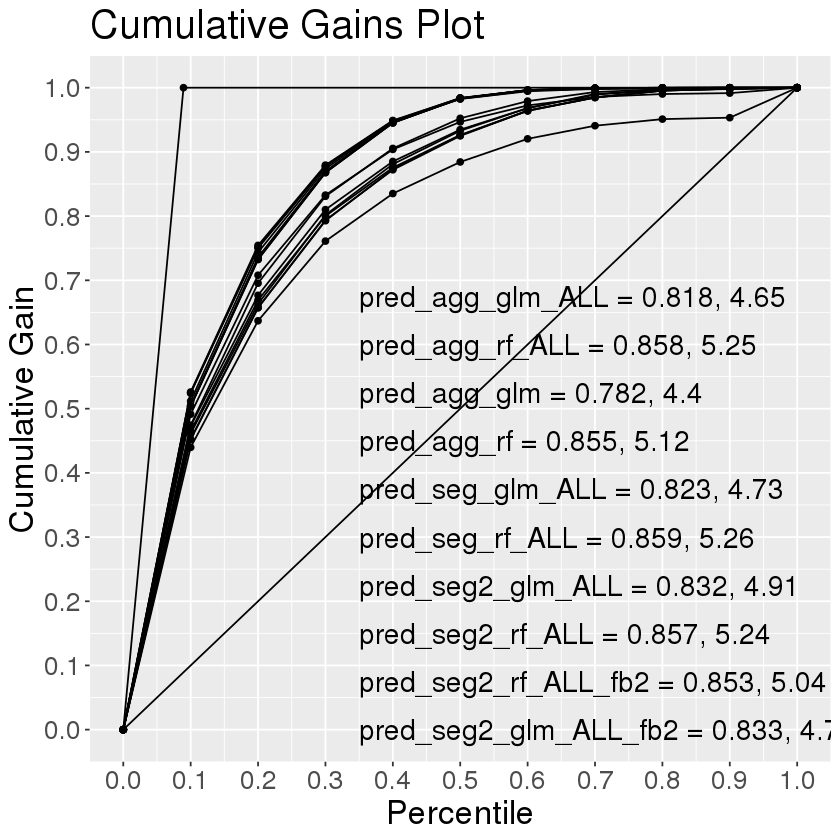

In [20]:
plot_multigains(            lift_df_list=lift_list,
                             auc_list = auc_list,
                             prop_positive = 0.08937016) 

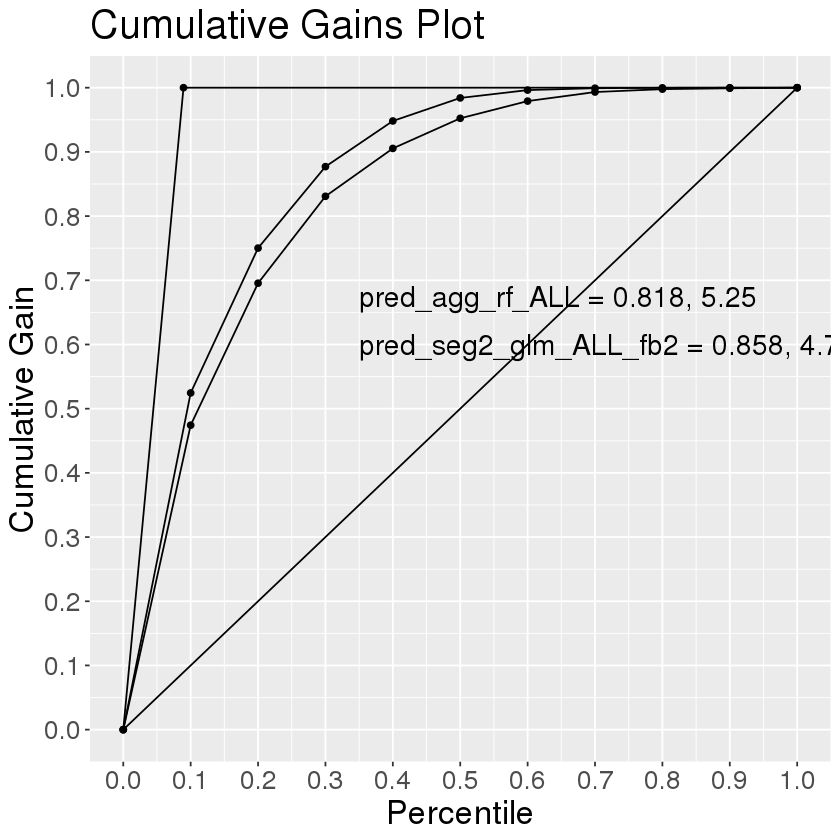

In [21]:
# just agg_rf_ALL versus seg2_glm_fb2
models <-  c('pred_agg_rf_ALL', 'pred_seg2_glm_ALL_fb2')
plot_multigains(            lift_df_list=lift_list[models],
                             auc_list = auc_list,
                             prop_positive = 0.08937016) 

In [22]:
lift_df_10 <- lift_df %>% filter(P==0.1) %>% select(contains("lift_")) %>% t()
lift_df_10

lift_ pred_agg_glm_ALL,4.651601
lift_ pred_agg_rf_ALL,5.245187
lift_ pred_agg_glm,4.397292
lift_ pred_agg_rf,5.116893
lift_ pred_seg_glm_ALL,4.730450
lift_ pred_seg_rf_ALL,5.259589
lift_ pred_seg2_glm_ALL,4.913470
lift_ pred_seg2_rf_ALL,5.241827
lift_ pred_seg2_rf_ALL_fb2,5.038524
lift_ pred_seg2_glm_ALL_fb2,4.742811
lift_ pred_seg_rf_ALL_fb2,5.048605


In [23]:
df <- as.data.frame(as.data.frame(lift_df_10))
df %>% arrange(V1)

,V1
,<dbl>
lift_ pred_agg_glm,4.397292
lift_ pred_agg_glm_fb2,4.518626
lift_ pred_agg_glm_ALL_fb2,4.526907
lift_ pred_seg_glm_ALL_fb2,4.611757
lift_ pred_agg_glm_ALL,4.651601
lift_ pred_seg_glm_ALL,4.730450
lift_ pred_seg2_glm_ALL_fb2,4.742811
lift_ pred_seg2_glm_ALL,4.913470
lift_ pred_agg_rf_ALL_fb2,5.035884


In [24]:
# improvement in performance of agg_rf over seg2_glm - lift@10%
(lift_df_10['lift_ pred_agg_rf_ALL',]-lift_df_10['lift_ pred_seg2_glm_ALL_fb2',])/lift_df_10['lift_ pred_seg2_glm_ALL_fb2',]

lift_ pred_agg_rf_ALL 
            0.1059237

In [25]:
df <- as.data.frame(as.data.frame(auc_list)) %>% t()
as.data.frame(df[order(df[,1]),])

,"df[order(df[, 1]), ]"
,<dbl>
pred_agg_glm,0.7822524
pred_agg_glm_ALL_fb2,0.8143224
pred_agg_glm_fb2,0.8144172
pred_agg_glm_ALL,0.8178628
pred_seg_glm_ALL_fb2,0.8194206
pred_seg_glm_ALL,0.8230858
pred_seg2_glm_ALL,0.8322152
pred_seg2_glm_ALL_fb2,0.8327589
pred_agg_rf_ALL_fb2,0.8527195


In [26]:
# improvement in performance of agg_rf over seg2_glm - auc
auc_list$pred_agg_rf_ALL
auc_list$pred_seg2_glm_ALL_fb2
(auc_list$pred_agg_rf_ALL-auc_list$pred_seg2_glm_ALL_fb2)/(auc_list$pred_seg2_glm_ALL_fb2)

[1] 0.8579293

[1] 0.8327589

[1] 0.03022534

In [27]:
# agg_rf vs. seg2_glm Sensitivity & Specificity at cutoff of .5 and =proppos
compare_df = as.data.frame(list('agg_rf_0.089'=confusionMatrix(as.factor(ifelse(preds_df$pred_agg_rf_ALL > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
                  'seg2_glm_fb_0.089'=confusionMatrix(as.factor(ifelse(preds_df$pred_seg2_glm_ALL_fb2 > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
              'agg_rf_0.500'=confusionMatrix(as.factor(ifelse(preds_df$pred_agg_rf_ALL > 0.5, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
                  'seg2_glm_fb_0.500'=confusionMatrix(as.factor(ifelse(preds_df$pred_seg2_glm_ALL_fb2 > 0.5, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass))
compare_df

,agg_rf_0.089,seg2_glm_fb_0.089,agg_rf_0.500,seg2_glm_fb_0.500
,<dbl>,<dbl>,<dbl>,<dbl>
Sensitivity,0.86437281,0.80430608,0.25372042,0.18124430
Specificity,0.76965877,0.77602845,0.98544562,0.98798619
Pos Pred Value,0.26915631,0.26059298,0.63111231,0.59686981
Neg Pred Value,0.98299985,0.97584912,0.93081930,0.92478653
Precision,0.26915631,0.26059298,0.63111231,0.59686981
Recall,0.86437281,0.80430608,0.25372042,0.18124430
F1,0.41049038,0.39364580,0.36193525,0.27805498
Prevalence,0.08937016,0.08937016,0.08937016,0.08937016
Detection Rate,0.07724914,0.07188096,0.02267503,0.01619783


In [28]:
# improvement in accuracy for agg_rf vs. seg2_glm (NOT REPORTED -- not appropriate for imbal data)
(compare_df['Sensitivity','agg_rf_0.089']-compare_df['Sensitivity','seg2_glm_fb_0.089'])/compare_df['Sensitivity','seg2_glm_fb_0.089']
compare_df = as.data.frame(list(
    'agg_rf_0.089'=confusionMatrix(as.factor(ifelse(preds_df$pred_agg_rf_ALL > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$overall['Accuracy'],
                  'seg2_glm_fb_0.089'=confusionMatrix(as.factor(ifelse(preds_df$pred_seg2_glm_ALL_fb2 > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$overall['Accuracy'],
              'agg_rf_0.500'=confusionMatrix(as.factor(ifelse(preds_df$pred_agg_rf_ALL > 0.5, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$overall['Accuracy'],
                  'seg2_glm_fb_0.500'=confusionMatrix(as.factor(ifelse(preds_df$pred_seg2_glm_ALL_fb2 > 0.5, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$overall['Accuracy']))
compare_df

[1] 0.07468143

,agg_rf_0.089,seg2_glm_fb_0.089,agg_rf_0.500,seg2_glm_fb_0.500
,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,0.7781234,0.7785556,0.9200512,0.9158875


# Performance comparison by reseller prioritization

In [29]:
system("gsutil cp gs://data_input/PredictiveModelAnalysis_ResellerPriorityList.csv /home/jupyter/Domains_202003/data/data_input/PredictiveModelAnalysis_ResellerPriorityList.csv")

In [30]:
priorityLookup_df <- read.csv("/home/jupyter/Domains_202003/data/data_input/PredictiveModelAnalysis_ResellerPriorityList.csv")
names(priorityLookup_df) <- c("market","reseller","npv2020","priority")
priorityLookup_df$reseller <- tolower(priorityLookup_df$reseller)
head(priorityLookup_df)
tail(priorityLookup_df)

,market,reseller,npv2020,priority
,<fct>,<chr>,<int>,<int>
1,North America,go daddy,4464876,1
2,North America,namecheap,1446577,1
3,North America,wix,700969,1
4,North America,google,544529,1
5,North America,network solutions,506413,1
6,North America,domain.com - registrar,472428,1


,market,reseller,npv2020,priority
,<fct>,<chr>,<int>,<int>
346,,ardetamedia,31,4
347,,indyadot,27,4
348,,hetzner,20,4
349,,"internet works online international (hk) co., limited",0,4
350,Oceania,iwantmyname,5399,4
351,Oceania,1stdomains,609,4


In [31]:
dim(preds_df)
preds_df$reseller <- tolower(preds_df$reseller)
preds_prio_df <- merge(preds_df, priorityLookup_df, by="reseller", all.x=TRUE)
dim(preds_prio_df)
head(preds_prio_df)

[1] 932347     59

[1] 932347     62

,reseller,reseller_country,domain_id,renewal_type,renewed_count,expiry_date,creation_date,status,domain,registrar,registrant_country,reg_period,reg_revenue,reg_arpt,renew_mbg,renewal_item_id,renew_type,autorenew_type,renewal_status,renew_date,renew_arpt,gibb_score,pattern,pattern_domain_count,day_domains,⋯,pred_seg_rf_ALL,pred_seg2_glm_ALL,pred_seg2_rf_ALL,reseller_geo,pred_agg_glm_ALL_fb,pred_agg_rf_ALL_fb,pred_agg_glm_fb,pred_agg_rf_fb,pred_seg_glm_ALL_fb,pred_seg_rf_ALL_fb,pred_seg2_glm_ALL_fb,pred_seg2_rf_ALL_fb,reg_arpt_org,reg_arpt_slab,pred_seg2_rf_ALL_fb2,pred_seg2_glm_ALL_fb2,pred_seg_rf_ALL_fb2,pred_seg_glm_ALL_fb2,pred_agg_rf_fb2,pred_agg_glm_fb2,pred_agg_rf_ALL_fb2,pred_agg_glm_ALL_fb2,market,npv2020,priority
,<chr>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>
1,,,122049036,FirstTime,1,2020-08-30,2019-08-30,Active,qianxiyun.online,,NA,1,25,25,0,341703158,auto-renewal,unrealized,Not Renewd,2020-08-30,6,0.63,qianxiyun,1,1,⋯,NA,NA,NA,NA,NA,0.9550391,NA,0.7713468,NA,NA,NA,NA,25,"(15,25]",0.5510000,0.5510000,0.5510000,0.551,0.7713468,0.551,0.9550391,0.551,NA,NA,NA
2,1&1 internet,Germany,94895964,FirstTime,1,2020-02-27,2019-02-27,Active,giftlounge.online,1&1 Internet,NA,1,5,5,0,295597014,auto-renewal,unrealized,Not Renewd,2020-02-27,25,6.00,giftlounge,1,46,⋯,0.5124886,0.5511992,0.5153714,EU,0.598,0.4498531,0.583,0.4699006,0.565,0.5124886,0.5511992,0.5153714,5,"(3,5]",0.5153714,0.5511992,0.5124886,0.565,0.4699006,0.583,0.4498531,0.598,Europe,770943,1
3,1&1 internet,Germany,93479293,FirstTime,1,2020-02-12,2019-02-12,Active,alaslatinaseurobox.store,1&1 Internet,NA,1,10,10,0,291186846,auto-renewal,realized,Renewed,2020-02-12,40,4.73,alaslatinaseurobox,1,5,⋯,0.5272619,0.5652465,0.5471357,EU,0.605,0.5380297,0.598,0.5684423,0.547,0.5272619,0.5652465,0.5471357,10,"(5,10]",0.5471357,0.5652465,0.5272619,0.547,0.5684423,0.598,0.5380297,0.605,Europe,770943,1
4,1&1 internet,Germany,94409039,FirstTime,1,2020-02-21,2019-02-21,Active,watergen.online,1&1 Internet,NA,1,5,5,0,293911644,auto-renewal,realized,Renewed,2020-02-21,25,9.41,watergenga,4,45,⋯,0.4886691,0.5465831,0.4652918,EU,0.576,0.4567632,0.562,0.4632213,0.560,0.4886691,0.5465831,0.4652918,5,"(3,5]",0.4652918,0.5465831,0.4886691,0.560,0.4632213,0.562,0.4567632,0.576,Europe,770943,1
5,1&1 internet,Germany,94606579,FirstTime,1,2020-02-23,2019-02-23,Active,tubazardecocina.online,1&1 Internet,NA,1,1,1,0,294365764,auto-renewal,unrealized,Not Renewd,2020-02-23,25,4.13,tubazardecocina,1,29,⋯,0.5614596,0.5274412,0.5995027,EU,0.557,0.6554817,0.546,0.6670280,0.542,0.5614596,0.5274412,0.5995027,1,"(0.3,1]",0.5995027,0.5274412,0.5614596,0.542,0.6670280,0.546,0.6554817,0.557,Europe,770943,1
6,1&1 internet,Germany,93457668,FirstTime,1,2020-02-12,2019-02-12,Active,politic.tech,1&1 Internet,NA,1,35,35,0,278569241,transfer,NA,Renewed,2020-01-12,35,8.53,politic,1,2,⋯,0.7984487,0.8094992,0.7917569,EU,0.768,0.8099875,0.761,0.8392476,0.587,0.7984487,0.8094992,0.7917569,35,"(25,35]",0.7917569,0.8094992,0.7984487,0.587,0.8392476,0.761,0.8099875,0.768,Europe,770943,1


In [32]:
# identify unmatched number of rows (4K/932K)
preds_prio_df %>%
  select(names(priorityLookup_df)) %>%  # replace to your needs
  summarise_all(funs(sum(is.na(.)))) %>% t()

market,4415
reseller,0
npv2020,4415
priority,4415


In [33]:
# unmatched resellers
preds_prio_df %>% filter(is.na(priority)) %>% select(reseller) %>% distinct()

reseller
<chr>
""
alastry
alpnames
amen
arvixe
boltn
brandma
compra
digivity


In [34]:


calc_lifts <- function (preds_df) {
    lift_list <- list()
    auc_list <- list()
    
    models <- c('pred_agg_glm_ALL','pred_agg_rf_ALL','pred_agg_glm','pred_agg_rf',
            'pred_seg_glm_ALL', 'pred_seg_rf_ALL','pred_seg2_glm_ALL','pred_seg2_rf_ALL',
           'pred_seg2_rf_ALL_fb2', 'pred_seg2_glm_ALL_fb2', 'pred_seg_rf_ALL_fb2', 
            'pred_seg_glm_ALL_fb2', 'pred_agg_rf_fb2', 'pred_agg_glm_fb2', 
            'pred_agg_rf_ALL_fb2','pred_agg_glm_ALL_fb2')

    fallback_lift <- chart_lift(pred_df=preds_df,
                            dep_var = "renewal_status",
                            pred_var = "pred_agg_glm_ALL") 

    lift_list[["fallback"]] <- fallback_lift
    auc_list[["fallback"]] <- calc_auc(lift_df=fallback_lift)




    for (model in models){
        model_lift <- chart_lift(pred_df=preds_df,
                            dep_var = "renewal_status",
                            pred_var = model) 

        fallback_lift <- merge(fallback_lift, model_lift, by=c("P"),all= TRUE, 
                               suffixes = c("",
                                            paste("_",gsub("pred_df_", "", model)) ))

        lift_list[[model]] <- model_lift
        auc_list[[model]] <- calc_auc(lift_df=model_lift)
    }

    lift_df <- fallback_lift
    
    return(list(lift_list, auc_list, lift_df))
}


In [35]:
# split pred_prio_df into lists by priorirty
# apply function above to each element of list via lapply
preds_prio_list <- split(preds_prio_df, preds_prio_df$priority)

In [36]:
prio_perf <- lapply(preds_prio_list, calc_lifts)

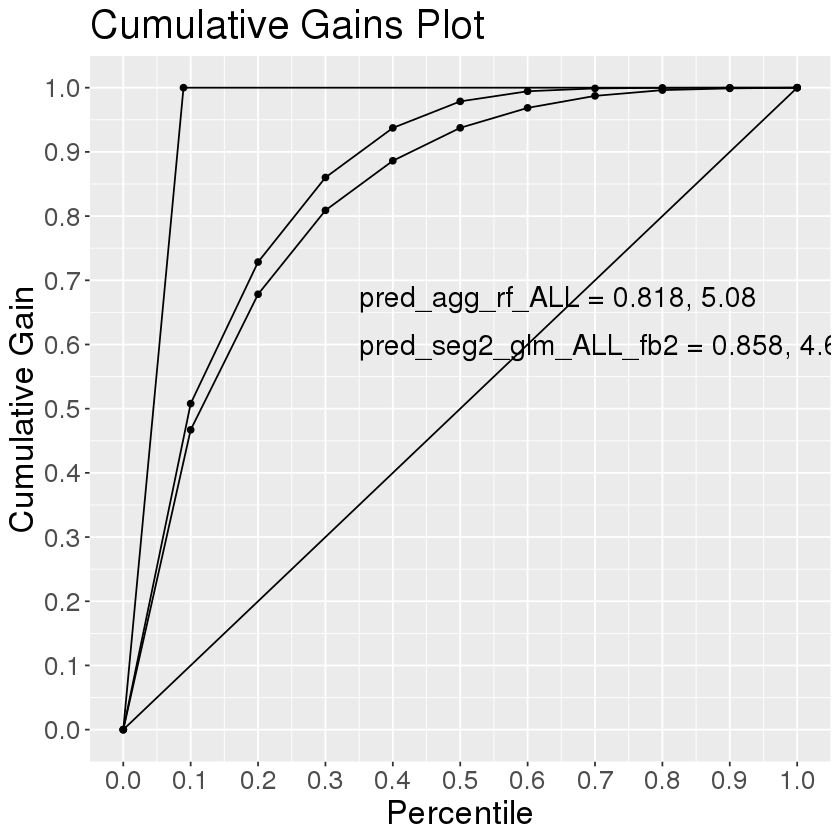

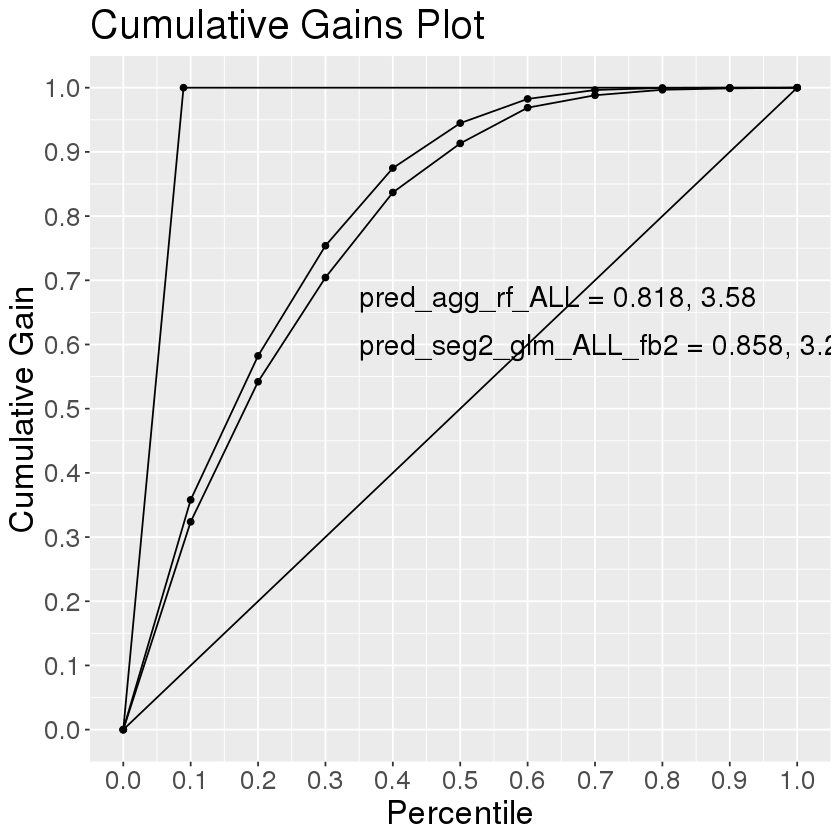

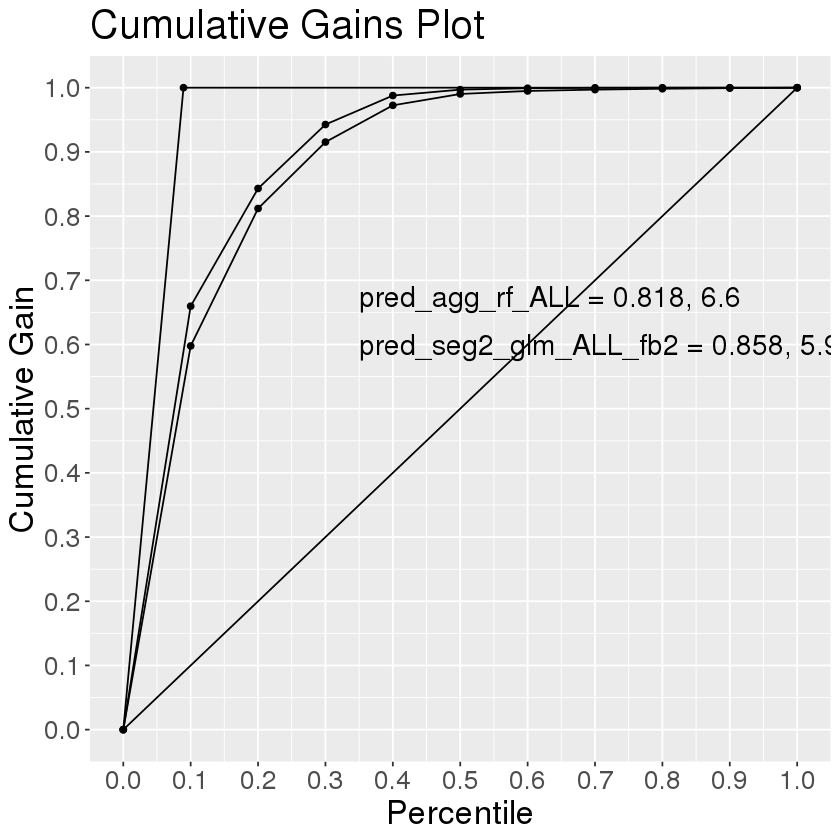

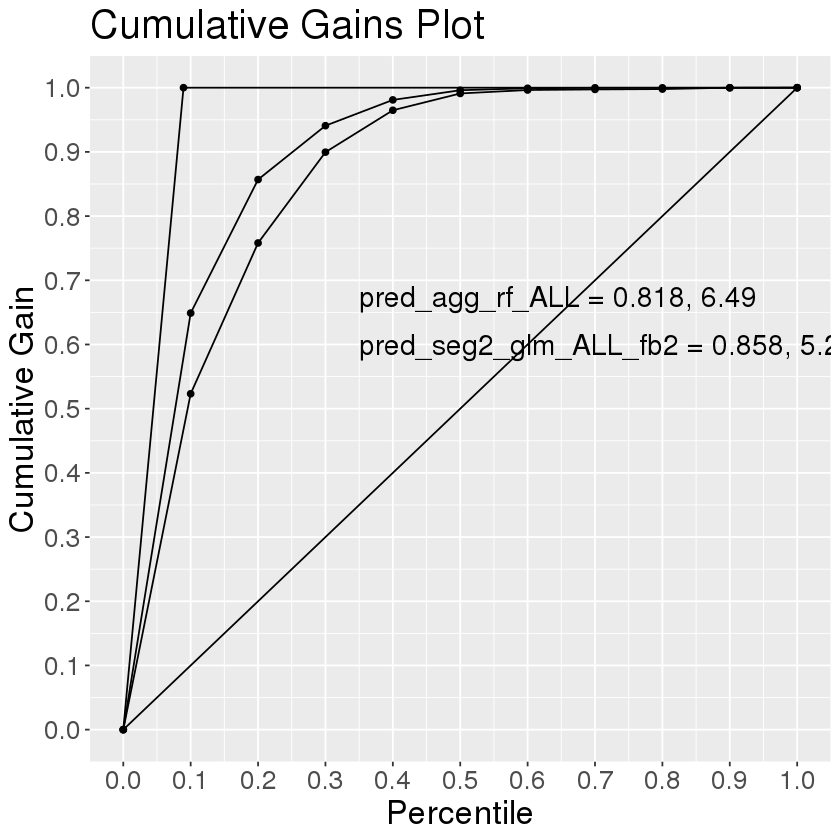

In [37]:
# PRIORITY1 just agg_rf_ALL versus seg2_glm_fb2
models <-  c('pred_agg_rf_ALL', 'pred_seg2_glm_ALL_fb2')
plot_multigains(            lift_df_list=prio_perf[[1]][[1]][models],
                             auc_list = auc_list,
                             prop_positive = 0.08937016) 
plot_multigains(            lift_df_list=prio_perf[[2]][[1]][models],
                             auc_list = auc_list,
                             prop_positive = 0.08937016) 
plot_multigains(            lift_df_list=prio_perf[[3]][[1]][models],
                             auc_list = auc_list,
                             prop_positive = 0.08937016) 
plot_multigains(            lift_df_list=prio_perf[[4]][[1]][models],
                             auc_list = auc_list,
                             prop_positive = 0.08937016) 

In [38]:
lift_df_10_list <- lapply(prio_perf, function(x) x[[3]] %>% filter(P==0.1) %>% select(contains("lift_")) %>% t())
 
lapply(lift_df_10_list, function(x) (x['lift_ pred_agg_rf_ALL',]-x['lift_ pred_seg2_glm_ALL_fb2',])/x['lift_ pred_seg2_glm_ALL_fb2',])
       

$`1`
lift_ pred_agg_rf_ALL 
           0.08750772 

$`2`
lift_ pred_agg_rf_ALL 
            0.1057851 

$`3`
lift_ pred_agg_rf_ALL 
            0.1035591 

$`4`
lift_ pred_agg_rf_ALL 
             0.240233

In [39]:
lapply(prio_perf, function(x) (x[[2]][['pred_agg_rf_ALL']]-x[[2]][['pred_seg2_glm_ALL_fb2']])/x[[2]][['pred_seg2_glm_ALL_fb2']])


$`1`
[1] 0.03362044

$`2`
[1] 0.02823656

$`3`
[1] 0.01729449

$`4`
[1] 0.03406033

In [40]:
# agg_rf vs. seg2_glm Sensitivity & Specificity at cutoff of .5 and =proppos

compare_function <- function(preds_df){
    compare_df = as.data.frame(list('agg_rf_0.089'=confusionMatrix(as.factor(ifelse(preds_df$pred_agg_rf_ALL > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
                  'seg2_glm_fb_0.089'=confusionMatrix(as.factor(ifelse(preds_df$pred_seg2_glm_ALL_fb2 > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
              'agg_rf_0.500'=confusionMatrix(as.factor(ifelse(preds_df$pred_agg_rf_ALL > 0.5, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
                  'seg2_glm_fb_0.500'=confusionMatrix(as.factor(ifelse(preds_df$pred_seg2_glm_ALL_fb2 > 0.5, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass))
    return(compare_df)
}

confres_list <- lapply(preds_prio_list,compare_function)

In [41]:
cat("True Positive Improvement @ 0.089 cutoff")
lapply(confres_list, function(x) (x['Sensitivity','agg_rf_0.089']-
                                  x['Sensitivity','seg2_glm_fb_0.089'])/x['Sensitivity','agg_rf_0.089'])
cat("\n\nTrue Positive Improvement @ 0.500 cutoff")
lapply(confres_list, function(x) (x['Sensitivity','agg_rf_0.500']-
                                  x['Sensitivity','seg2_glm_fb_0.500'])/x['Sensitivity','agg_rf_0.500'])

True Positive Improvement @ 0.089 cutoff

$`1`
[1] 0.07888152

$`2`
[1] 0.01052532

$`3`
[1] 0.07149983

$`4`
[1] 0.09973102



True Positive Improvement @ 0.500 cutoff

$`1`
[1] 0.1868107

$`2`
[1] 0.3421448

$`3`
[1] 0.4749287

$`4`
[1] 0.648679

In [42]:
# improvement in accuracy for agg_rf vs. seg2_glm (NOT REPORTED -- not appropriate for imbal data)

accuracy_function <- function(preds_df){
    compare_df = as.data.frame(list(
    'agg_rf_0.089'=confusionMatrix(as.factor(ifelse(preds_df$pred_agg_rf_ALL > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$overall['Accuracy'],
                  'seg2_glm_fb_0.089'=confusionMatrix(as.factor(ifelse(preds_df$pred_seg2_glm_ALL_fb2 > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$overall['Accuracy'],
              'agg_rf_0.500'=confusionMatrix(as.factor(ifelse(preds_df$pred_agg_rf_ALL > 0.5, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$overall['Accuracy'],
                  'seg2_glm_fb_0.500'=confusionMatrix(as.factor(ifelse(preds_df$pred_seg2_glm_ALL_fb2 > 0.5, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$overall['Accuracy']))
    return(compare_df)
}

accres_list <- lapply(preds_prio_list,accuracy_function)


accres_list

,agg_rf_0.089,seg2_glm_fb_0.089,agg_rf_0.500,seg2_glm_fb_0.500
,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,0.7689669,0.7724683,0.9186583,0.9157294
,agg_rf_0.089,seg2_glm_fb_0.089,agg_rf_0.500,seg2_glm_fb_0.500
,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,0.6553462,0.6270079,0.8538339,0.84751
,agg_rf_0.089,seg2_glm_fb_0.089,agg_rf_0.500,seg2_glm_fb_0.500
,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,0.8537438,0.8639822,0.9494949,0.9429803
,agg_rf_0.089,seg2_glm_fb_0.089,agg_rf_0.500,seg2_glm_fb_0.500
,<dbl>,<dbl>,<dbl>,<dbl>


# in seg2_glm vs seg2_glm_fb -- 
## for which tld-re's is/isn't fallback appopriate?